In [3]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ast

In [3]:
df_t = pd.read_csv('../../Data/Estratos/conserved_regions/ConservedRegions_kmeans_t.tsv', sep = '\t')
df_t

,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Variable
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
5429,29899,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5430,29900,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5431,29901,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5432,29902,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved


# Identificación de estructuras secundarias
* "." No forman estructura secundaria.
* "(", ")" Un paréntesis abierto y un paréntesis cerrado que están al mismo nivel indican un par de bases. Por ejemplo, en la secuencia ((..)), los dos nucleótidos en las posiciones 1 y 6 forman un par de bases, al igual que los nucleótidos en las posiciones 2 y 5.

In [3]:
files = os.listdir('../../Data/Estratos/PredictFold/Variants/')

expr = r".*\.txt$"
files = [cadena for cadena in files if re.search(expr, cadena)]
files[0:3]

['concensus_sequence_19A_predict_fold.txt',
 'concensus_sequence_19B_predict_fold.txt',
 'concensus_sequence_20A_predict_fold.txt']

In [4]:
def contar_caracteres(string):
    return ['fold' if s in '()' else 'non-fold' for s in string]

df_db = pd.DataFrame()
for filename in files:
    num = 1
    if filename == 'concensus_predict_fold.txt':
        ID = 'Global'
    elif filename == 'ref_predict_fold.txt':
        ID = 'reference'
        num = 2
    else:
        ID = filename.replace('concensus_sequence_', '').replace('_predict_fold.txt', '')
    with open('../../Data/Estratos/PredictFold/Variants/' + filename) as file:
        content = file.read()
        content = content.split('\n')[num].split(' ')[0]
        
    fold = contar_caracteres(content)
    df_i = pd.DataFrame({'Site': list(range(1, len(fold)+1)), 'Structure':fold, 'Variant':[ID]*len(fold)})
    df_db = pd.concat([df_db, df_i])
df_db

,Site,Structure,Variant
0,1,non-fold,19A
1,2,non-fold,19A
2,3,non-fold,19A
3,4,non-fold,19A
4,5,non-fold,19A
...,...,...,...
29898,29899,non-fold,recombinant
29899,29900,non-fold,recombinant
29900,29901,non-fold,recombinant
29901,29902,non-fold,recombinant


In [5]:
# Regiones
#5'UTR	1	265	reg	.
#3'UTR	29675	29903	reg	.

df_db[(df_db['Variant'] == '23A') & (df_db['Structure']=='fold')&(df_db['Site']<=265)]
#df_db[(df_db['Variant'] == '23A') & (df_db['Structure']=='fold')&(df_db['Site']>=29675)]
#df_db[(df_db['Variant'] == '23F') & (df_db['Structure']=='fold')]

,Site,Structure,Variant
6,7,fold,23A
7,8,fold,23A
8,9,fold,23A
9,10,fold,23A
10,11,fold,23A
...,...,...,...
260,261,fold,23A
261,262,fold,23A
262,263,fold,23A
263,264,fold,23A


# Merge in variants

In [5]:
df_v = pd.read_csv('../../Data/Estratos/conserved_regions/ConservedRegions_kmeans_v.tsv', sep = '\t')
df_sv = pd.merge(df_v, df_db, on=['Site', 'Variant'])
df_sv

,Site,H,Region,Variant,Group,Structure
0,1,0.094966,5'UTR,19A,Conserved,non-fold
1,2,0.074244,5'UTR,19A,Conserved,non-fold
2,3,0.060938,5'UTR,19A,Conserved,non-fold
3,4,0.153190,5'UTR,19A,Semi-conserved,non-fold
4,5,0.052358,5'UTR,19A,Conserved,non-fold
...,...,...,...,...,...,...
18767,29899,-0.000000,3'UTR,recombinant,High-conserved,non-fold
18768,29900,-0.000000,3'UTR,recombinant,High-conserved,non-fold
18769,29901,-0.000000,3'UTR,recombinant,High-conserved,non-fold
18770,29902,-0.000000,3'UTR,recombinant,High-conserved,non-fold


# Plot of count structures

In [18]:
df_svfregion = df_sv[(df_sv['Region'] == "5'UTR") | (df_sv ['Region'] == "3'UTR")]
count_structures = pd.DataFrame(df_svfregion[['Region', 'Variant', 'Structure']].groupby(by = ['Variant', 'Region']).value_counts()).reset_index()
count_structures

,Variant,Region,Structure,count
0,19A,3'UTR,fold,148
1,19A,3'UTR,non-fold,81
2,19A,5'UTR,fold,169
3,19A,5'UTR,non-fold,96
4,19B,3'UTR,fold,148
...,...,...,...,...
147,23F,5'UTR,non-fold,91
148,recombinant,3'UTR,non-fold,129
149,recombinant,3'UTR,fold,100
150,recombinant,5'UTR,fold,174


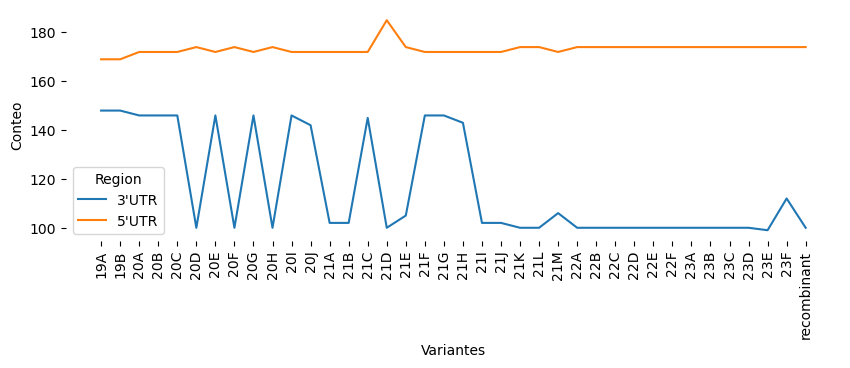

In [33]:
plt.figure(figsize=(10, 3))
ax = sns.lineplot(data = count_structures[count_structures['Structure'] == 'fold'], x = 'Variant', y = 'count', hue = 'Region')
plt.xticks(rotation=90)
# Elimina los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Variantes')
plt.ylabel('Conteo')

plt.savefig('../../Plots/ConteoEstructurasSecundariasVariantes.pdf', bbox_inches='tight')

# Identificación de estructuras secundarias conservadas

In [7]:
df_in_sv = pd.DataFrame(df_sv.groupby(by=['Site', 'Structure'])[['Site', 'Structure', 'Region']].value_counts()).reset_index()
df_in_sv

,Site,Structure,Region,0
0,1,non-fold,5'UTR,38
1,2,non-fold,5'UTR,38
2,3,non-fold,5'UTR,38
3,4,non-fold,5'UTR,38
4,5,non-fold,5'UTR,38
...,...,...,...,...
737,29899,non-fold,3'UTR,38
738,29900,non-fold,3'UTR,38
739,29901,non-fold,3'UTR,38
740,29902,non-fold,3'UTR,38


In [8]:
df_in_sv[(df_in_sv['Structure']=='fold') & (df_in_sv[0]==38)]

,Site,Structure,Region,0
7,7,fold,5'UTR,38
8,8,fold,5'UTR,38
9,9,fold,5'UTR,38
18,14,fold,5'UTR,38
19,15,fold,5'UTR,38
...,...,...,...,...
582,29805,fold,3'UTR,38
630,29830,fold,3'UTR,38
633,29832,fold,3'UTR,38
678,29855,fold,3'UTR,38


In [9]:
len(df_in_sv[(df_in_sv['Structure']=='fold') & (df_in_sv[0]==38) & (df_in_sv['Region']=="3'UTR")])

22

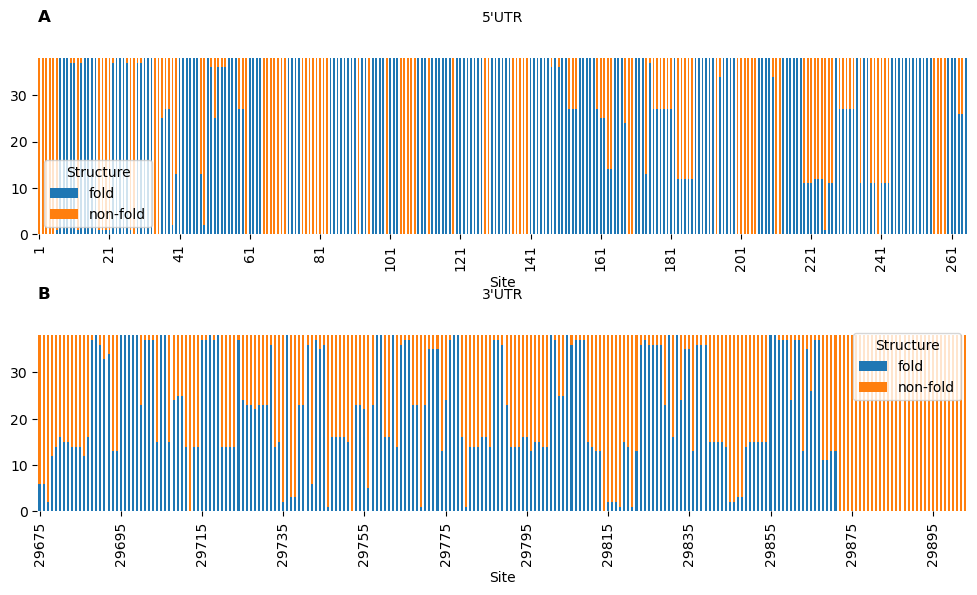

In [10]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 1)

# 5 UTR
ax1 = fig.add_subplot(gs[0, 0])
df_filtered = df_in_sv[df_in_sv['Region']=="5'UTR"]
df_pivot = df_filtered.pivot_table(index='Site', columns='Structure', values=0, aggfunc='sum').fillna(0)

#ax1 = sns.lineplot(data=df_filtered[df_filtered['Structure']=='fold'], x = 'Site', y = 0, color='red')

min_val = df_pivot.index.min()
max_val = df_pivot.index.max()

sites = list(range(min_val, max_val+1, 20))
df_pivot.plot(kind='bar', stacked=True, ax=ax1)


ax1.set_xticks([df_pivot.index.get_loc(site) for site in sites if site in df_pivot.index])

plt.title('A', fontweight="bold", loc = 'left')
plt.title("5'UTR", fontsize=10, pad=20)

# Elimina los bordes del gráfico
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.subplots_adjust(hspace=0.5)




#3 UTR
ax2 = fig.add_subplot(gs[1, 0])
df_filtered2 = df_in_sv[df_in_sv['Region']=="3'UTR"]
df_pivot2 = df_filtered2.pivot_table(index='Site', columns='Structure', values=0, aggfunc='sum').fillna(0)

#ax1 = sns.lineplot(data=df_filtered[df_filtered['Structure']=='fold'], x = 'Site', y = 0, color='red')

min_val2 = df_pivot2.index.min()
max_val2 = df_pivot2.index.max()

sites2 = list(range(min_val2, max_val2+1, 20))
df_pivot2.plot(kind='bar', stacked=True, ax=ax2)


ax2.set_xticks([df_pivot2.index.get_loc(site) for site in sites2 if site in df_pivot2.index])

plt.title('B', fontweight="bold", loc = 'left')
plt.title("3'UTR", fontsize=10, pad=20)

# Elimina los bordes del gráfico
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.subplots_adjust(hspace=0.5)


plt.savefig('../../Plots/FoldComparative_v.pdf')

# Filtro

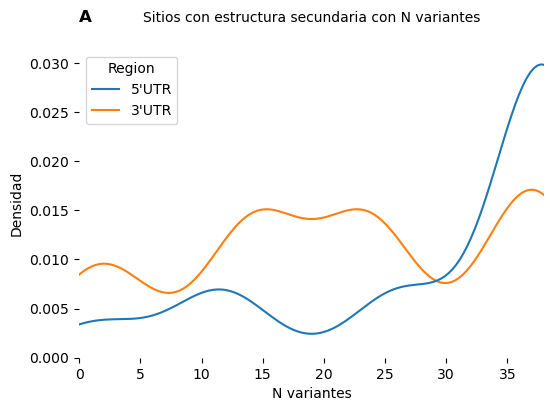

In [11]:
fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(1, 1)


ax2 = fig.add_subplot(gs[0, 0])
sns.kdeplot(data=df_in_sv, x=0, hue='Region', ax=ax2)
ax2.set_xlim([0, df_in_sv[0].max()])
plt.xlabel('N variantes')
plt.ylabel('Densidad')
plt.title("A", fontweight="bold", loc = 'left')
ax2.set_title('Sitios con estructura secundaria con N variantes', fontsize=10, pad=20)

#delete box
sns.despine(left=True, bottom=True)
plt.savefig('../../Plots/ConteoEstructurasSecundarias.pdf')

In [12]:
quitar = list(df_in_sv[(df_in_sv[0]==11) & (df_in_sv['Structure']=='fold')]['Site'])


df_svf = df_sv[(df_sv['Group']=='High-conserved')]
df_svf = df_svf[~df_svf['Site'].isin(quitar)]
df_svf

,Site,H,Region,Variant,Group,Structure
5,6,-0.000000,5'UTR,19A,High-conserved,non-fold
8,9,0.028457,5'UTR,19A,High-conserved,fold
11,12,0.030883,5'UTR,19A,High-conserved,non-fold
13,14,0.022612,5'UTR,19A,High-conserved,fold
14,15,0.009437,5'UTR,19A,High-conserved,fold
...,...,...,...,...,...,...
18767,29899,-0.000000,3'UTR,recombinant,High-conserved,non-fold
18768,29900,-0.000000,3'UTR,recombinant,High-conserved,non-fold
18769,29901,-0.000000,3'UTR,recombinant,High-conserved,non-fold
18770,29902,-0.000000,3'UTR,recombinant,High-conserved,non-fold


In [13]:
quitar

[219, 220, 221, 226, 227, 235, 238, 239, 241, 242, 243, 29868, 29869]

In [4]:
df_tf = df_t[(df_t['Group']=='High-conserved')]
df_tf

,Site,H,Region,Variant,Group
30,31,0.020671,5'UTR,Global,High-conserved
31,32,0.005547,5'UTR,Global,High-conserved
32,33,0.008934,5'UTR,Global,High-conserved
33,34,0.012441,5'UTR,Global,High-conserved
34,35,0.019033,5'UTR,Global,High-conserved
...,...,...,...,...,...
5429,29899,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5430,29900,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5431,29901,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5432,29902,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved


In [5]:
df_gt = pd.read_csv('../../Data/Estratos/conserved_regions/ConservedRegions_kmeans_gt.tsv', sep = '\t')
df_gtf = df_gt[(df_gt['Group']=='High-conserved')]
df_gtf

,Site,H,Region,Variant,Group
30,31,0.020671,5'UTR,Global,High-conserved
31,32,0.005547,5'UTR,Global,High-conserved
32,33,0.008934,5'UTR,Global,High-conserved
33,34,0.012441,5'UTR,Global,High-conserved
34,35,0.019033,5'UTR,Global,High-conserved
...,...,...,...,...,...
1477,29899,-0.000000,3'UTR,Gst2,High-conserved
1478,29900,0.009782,3'UTR,Gst2,High-conserved
1479,29901,0.009097,3'UTR,Gst2,High-conserved
1480,29902,0.009150,3'UTR,Gst2,High-conserved


In [6]:
df_s = pd.read_csv('../../Data/Estratos/conserved_regions/ConservedRegions_kmeans_s.tsv', sep = '\t')
df_sf = df_s[(df_s['Group']=='High-conserved')]
df_sf

,Site,H,Region,Variant,Group
30,31,0.020671,5'UTR,Global,High-conserved
31,32,0.005547,5'UTR,Global,High-conserved
32,33,0.008934,5'UTR,Global,High-conserved
33,34,0.012441,5'UTR,Global,High-conserved
34,35,0.019033,5'UTR,Global,High-conserved
...,...,...,...,...,...
2957,29897,-0.000000,3'UTR,G5,High-conserved
2958,29898,0.013406,3'UTR,G5,High-conserved
2960,29900,0.024762,3'UTR,G5,High-conserved
2961,29901,0.013620,3'UTR,G5,High-conserved


In [7]:
df_sp = pd.read_csv('../../Data/Estratos/conserved_regions/ConservedRegions_kmeans_sp.tsv', sep = '\t')
df_spf = df_sp[(df_sp['Group']=='High-conserved')]
df_spf

,Site,H,Region,Variant,Group
26,27,0.055872,5'UTR,Global,High-conserved
27,28,0.050037,5'UTR,Global,High-conserved
28,29,0.053500,5'UTR,Global,High-conserved
30,31,0.020671,5'UTR,Global,High-conserved
31,32,0.005547,5'UTR,Global,High-conserved
...,...,...,...,...,...
2465,29899,0.006292,3'UTR,Cluster_4,High-conserved
2466,29900,0.010736,3'UTR,Cluster_4,High-conserved
2467,29901,0.005936,3'UTR,Cluster_4,High-conserved
2468,29902,0.007866,3'UTR,Cluster_4,High-conserved


In [43]:
df_t[df_t['Variant']!='jkh'][['Variant', 'Region']].groupby('Variant').value_counts().reset_index()#.groupby('Region').std(numeric_only=True)

,Variant,Region,count
0,"(2010-12-05,2020-03-01]",5'UTR,265
1,"(2010-12-05,2020-03-01]",3'UTR,229
2,"(2020-03-01,2020-09-01]",5'UTR,265
3,"(2020-03-01,2020-09-01]",3'UTR,229
4,"(2020-09-01,2021-01-01]",5'UTR,265
5,"(2020-09-01,2021-01-01]",3'UTR,229
6,"(2021-01-01,2021-05-01]",5'UTR,265
7,"(2021-01-01,2021-05-01]",3'UTR,229
8,"(2021-05-01,2022-01-01]",5'UTR,265
9,"(2021-05-01,2022-01-01]",3'UTR,229


In [55]:
df_list = [df_tf, df_gtf, df_spf]

for i in df_list:
    df_name = [name for name in globals() if globals()[name] is i]
    
    print(f'''
          Nombre: {df_name[0]}.
          Sitios conservados: {len(i)}.
          Sitios promedio: {i[i['Variant']!='Global'][['Variant']].value_counts().agg(['mean', 'std'], numeric_only=True)}
          
          Region:
            mean
            {i[i['Variant']!='Global'][['Variant', 'Region']].groupby('Variant').value_counts().reset_index().groupby('Region').mean(numeric_only=True)},
            std
            {i[i['Variant']!='Global'][['Variant', 'Region']].groupby('Variant').value_counts().reset_index().groupby('Region').std(numeric_only=True)}
===
    ''')


          Nombre: df_tf.
          Sitios conservados: 4694.
          Sitios promedio: mean    430.200000
std      24.809496
Name: count, dtype: float64
          
          Region:
            mean
                    count
Region       
3'UTR   181.4
5'UTR   248.8,
            std
                        count
Region           
3'UTR   17.289689
5'UTR    9.247222
===
    

          Nombre: df_gtf.
          Sitios conservados: 1333.
          Sitios promedio: mean    465.500000
std       0.707107
Name: count, dtype: float64
          
          Region:
            mean
                    count
Region       
3'UTR   211.5
5'UTR   254.0,
            std
                       count
Region          
3'UTR   3.535534
5'UTR   4.242641
===
    

          Nombre: df_spf.
          Sitios conservados: 2160.
          Sitios promedio: mean    438.00000
std      20.75251
Name: count, dtype: float64
          
          Region:
            mean
                     count
Region        
3'U

# Identificacion de regiones conservadas consecutivas

In [18]:
def extract_consecutive(df):
    lst_variants = []
    for i in df['Variant'].unique():
        df_i = df[(df['Variant']==i)]
        sitios = list(df_i['Site'])
        lst_sitios_consecutivos = []
        lst = []
        for j in range(len(sitios)-1):
            if sitios[j]+1 != sitios[j+1]:
                lst_sitios_consecutivos.append(list(set(lst)))
                lst = []
            else:
                lst.append(sitios[j])
                lst.append(sitios[j+1])
        
        lst_sitios_consecutivos.append(list(set(lst)))
        lst_sitios_consecutivos = [sublista for sublista in lst_sitios_consecutivos if len(sublista) >= 4]
        lst_variants.append(lst_sitios_consecutivos)
    variantes = df['Variant'].unique(); df_bd = pd.DataFrame()
    for i in range(len(variantes)):
        df_i = pd.DataFrame({'Variante':variantes[i],
                             'RegionesConservadas':lst_variants[i]})
        df_bd = pd.concat([df_bd, df_i])
    return df_bd

In [19]:
df_conserved_tf = extract_consecutive(df_tf)
df_conserved_tf

,Variante,RegionesConservadas
0,Global,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4..."
1,Global,"[175, 176, 177, 178, 179, 180, 181, 182, 183, ..."
2,Global,"[205, 206, 207, 208, 209]"
3,Global,"[211, 212, 213, 214, 215, 216, 217, 218, 219, ..."
4,Global,"[224, 225, 226, 227, 228, 229, 230, 231, 232, ..."
...,...,...
14,"(2023-07-01,2023-09-06]","[29770, 29771, 29772, 29773]"
15,"(2023-07-01,2023-09-06]","[29776, 29777, 29778, 29775]"
16,"(2023-07-01,2023-09-06]","[29824, 29825, 29826, 29827, 29828, 29829, 298..."
17,"(2023-07-01,2023-09-06]","[29856, 29857, 29858, 29859, 29860, 29861, 298..."


In [20]:
df_conserved_v = extract_consecutive(df_svf)
df_conserved_v

,Variante,RegionesConservadas
0,19A,"[17, 18, 19, 20]"
1,19A,"[22, 23, 24, 25, 26, 27]"
2,19A,"[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4..."
3,19A,"[224, 225, 222, 223]"
4,19A,"[228, 229, 230, 231, 232, 233, 234]"
...,...,...
16,recombinant,"[29743, 29744, 29745, 29746, 29747, 29748, 297..."
17,recombinant,"[29763, 29764, 29765, 29766, 29767, 29768, 297..."
18,recombinant,"[29824, 29825, 29826, 29827, 29828, 29829, 298..."
19,recombinant,"[29859, 29860, 29861, 29862, 29863]"


In [21]:
df_conserved_gt = extract_consecutive(df_gtf)
df_conserved_gt

,Variante,RegionesConservadas
0,Global,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4..."
1,Global,"[175, 176, 177, 178, 179, 180, 181, 182, 183, ..."
2,Global,"[205, 206, 207, 208, 209]"
3,Global,"[211, 212, 213, 214, 215, 216, 217, 218, 219, ..."
4,Global,"[224, 225, 226, 227, 228, 229, 230, 231, 232, ..."
5,Global,"[256, 257, 258, 259, 260, 261, 262, 263, 264, ..."
6,Global,"[29675, 29676, 29677, 29678, 29679, 29680, 296..."
7,Global,"[29696, 29697, 29698, 29699, 29693, 29694, 29695]"
8,Global,"[29701, 29702, 29703, 29704, 29705]"
9,Global,"[29707, 29708, 29709, 29710]"


In [22]:
df_conserved_s = extract_consecutive(df_sf)
df_conserved_s

,Variante,RegionesConservadas
0,Global,"[32, 33, 34, 35, 31]"
1,Global,"[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4..."
2,Global,"[64, 65, 62, 63]"
3,Global,"[67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 7..."
4,Global,"[128, 129, 130, 131, 132, 133, 134, 135, 136, ..."
...,...,...
15,G5,"[29824, 29825, 29826, 29827, 29828, 29829, 298..."
16,G5,"[29835, 29836, 29837, 29838, 29839, 29840, 298..."
17,G5,"[29862, 29863, 29864, 29865, 29866]"
18,G5,"[29871, 29872, 29873, 29874, 29875, 29876, 298..."


In [26]:
df_conserved_sp = extract_consecutive(df_spf)
d = {'Cluster_1': 'Gs1', 'Cluster_2': 'Gs2', 'Cluster_3':'Gs3' , 'Cluster_4':'Gs4'}
df_conserved_sp = df_conserved_sp.replace(d)
df_conserved_sp

,Variante,RegionesConservadas
0,Global,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4..."
1,Global,"[175, 176, 177, 178, 179, 180, 181, 182, 183, ..."
2,Global,"[204, 205, 206, 207, 208, 209]"
3,Global,"[211, 212, 213, 214, 215, 216, 217, 218, 219, ..."
4,Global,"[224, 225, 226, 227, 228, 229, 230, 231, 232, ..."
...,...,...
14,Gs4,"[29770, 29771, 29772, 29773]"
15,Gs4,"[29776, 29777, 29778, 29775]"
16,Gs4,"[29824, 29825, 29826, 29827, 29828, 29829, 298..."
17,Gs4,"[29835, 29836, 29837, 29838, 29839, 29840, 298..."


# Save

In [27]:
df_conserved_tf.to_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasTimes.tsv', sep = '\t', index = False)
df_conserved_v.to_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasSinFoldVariants.tsv', sep = '\t', index = False)
df_conserved_gt.to_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasGrafosConstantes.tsv', sep = '\t', index = False)
df_conserved_s.to_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasSpectral.tsv', sep = '\t', index = False)
df_conserved_sp.to_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasSpectrum.tsv', sep = '\t', index = False)

# Inspect

In [4]:
df_conserved_tf = pd.read_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasTimes.tsv', sep = '\t')
df_conserved_v = pd.read_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasSinFoldVariants.tsv', sep = '\t')
df_conserved_gt = pd.read_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasGrafosConstantes.tsv', sep = '\t')
df_conserved_s = pd.read_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasSpectral.tsv', sep = '\t')
df_conserved_sp = pd.read_csv('../../Data/Estratos/consecutive_conserved/RegionesConsecutivasConservadasSpectrum.tsv', sep = '\t')
df_conserved_tf

,Variante,RegionesConservadas
0,Global,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4..."
1,Global,"[175, 176, 177, 178, 179, 180, 181, 182, 183, ..."
2,Global,"[205, 206, 207, 208, 209]"
3,Global,"[211, 212, 213, 214, 215, 216, 217, 218, 219, ..."
4,Global,"[224, 225, 226, 227, 228, 229, 230, 231, 232, ..."
...,...,...
190,"(2023-07-01,2023-09-06]","[29770, 29771, 29772, 29773]"
191,"(2023-07-01,2023-09-06]","[29776, 29777, 29778, 29775]"
192,"(2023-07-01,2023-09-06]","[29824, 29825, 29826, 29827, 29828, 29829, 298..."
193,"(2023-07-01,2023-09-06]","[29856, 29857, 29858, 29859, 29860, 29861, 298..."


In [17]:
ii

,Variante,RegionesConservadas,LenConserved,Region
20,Gs1,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...",16,5'UTR
21,Gs1,"[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3...",22,5'UTR
22,Gs1,"[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 5...",129,5'UTR
23,Gs1,"[175, 176, 177, 178, 179, 180, 181, 182, 183, ...",26,5'UTR
24,Gs1,"[204, 205, 206, 207, 208, 209]",6,5'UTR
...,...,...,...,...
89,Gs4,"[29770, 29771, 29772, 29773]",4,3'UTR
90,Gs4,"[29776, 29777, 29778, 29775]",4,3'UTR
91,Gs4,"[29824, 29825, 29826, 29827, 29828, 29829, 298...",52,3'UTR
92,Gs4,"[29835, 29836, 29837, 29838, 29839, 29840, 298...",22,3'UTR


In [19]:
def add_region(df):
    lst = []; lst_region = []
    for i in df.RegionesConservadas:
        lst_i = ast.literal_eval(i)
        lst.append(len(lst_i))
        if int(lst_i[0]) <= 265:
            lst_region.append("5'UTR")
        else:
            lst_region.append("3'UTR")
    

    df['LenConserved'] = lst
    df['Region'] = lst_region

    return df

df_list = [df_conserved_tf, df_conserved_v, df_conserved_gt, df_conserved_s, df_conserved_sp]

for i in df_list:
    df_name = [name for name in globals() if globals()[name] is i]

    add_region(i)
    ii = i[i['Variante']!='Global']

    print(f'''
        Nombre: {df_name}
        Regiones con sitios consecutivos altamente conservados: {len(ii)}
        Promedio por variante: {ii['Variante'].value_counts().agg(['mean', 'std'], numeric_only=True)}
        Region:
            mean
            {ii[['Variante', 'Region']].groupby('Variante').value_counts().reset_index().groupby('Region').mean(numeric_only=True)},
            std
            {ii[['Variante', 'Region']].groupby('Variante').value_counts().reset_index().groupby('Region').std(numeric_only=True)}
        Tamaño promedio de regiones:
            {ii[['Region', 'LenConserved']].groupby('Region').agg(['mean', 'std'])}
        =============
    ''')


        Nombre: ['__', '___', 'df_conserved_tf', '_4', '_5', '_6', 'i']
        Regiones con sitios consecutivos altamente conservados: 175
        Promedio por variante: mean    17.500000
std      4.600725
Name: count, dtype: float64
        Region:
            mean
                    count
Region       
3'UTR    10.9
5'UTR     6.6,
            std
                       count
Region          
3'UTR   2.884826
5'UTR   2.011080
        Tamaño promedio de regiones:
                   LenConserved           
               mean        std
Region                        
3'UTR     15.394495  15.744498
5'UTR     37.166667  50.465703
    

        Nombre: ['df_conserved_v', 'i']
        Regiones con sitios consecutivos altamente conservados: 566
        Promedio por variante: mean    14.894737
std      3.126084
Name: count, dtype: float64
        Region:
            mean
                       count
Region          
3'UTR   7.078947
5'UTR   7.815789,
            std
                       